In [82]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rc

import warnings
warnings.filterwarnings('ignore')

# Average Congestion by Hour 
Read congestion data, calculate average congestion, plot average congestion by hour

In [83]:
# Read congestion file into DataFrame
congestion = pd.read_csv("Resources/Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Region_-_2013-2018.csv", low_memory=False)

#Display DataFrame head
congestion.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED
0,01/29/2015 01:40:35 PM,22,33,429,25.23
1,01/05/2015 01:10:46 PM,18,58,1058,21.14
2,01/20/2015 05:01:21 AM,14,26,394,25.23
3,01/03/2015 05:10:25 AM,24,17,360,23.86
4,01/10/2015 08:31:12 PM,23,54,761,19.77


In [84]:
# Display summary of congestion DataFrame
congestion.describe()

,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED
count,7.089311e+06,7.089311e+06,7.089311e+06,7.089311e+06
mean,1.500000e+01,3.642507e+01,5.470367e+02,2.235961e+01
std,8.366601e+00,2.922485e+01,4.481749e+02,8.580152e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,1.400000e+01,2.040000e+02,1.977000e+01
50%,1.500000e+01,3.000000e+01,4.530000e+02,2.380000e+01
75%,2.200000e+01,5.100000e+01,7.840000e+02,2.700000e+01
max,2.900000e+01,2.900000e+02,5.379000e+03,1.738600e+02


In [85]:
# Create new DataFrame with Date and Time columns (split date from time and store separately)
congestion2 = pd.DataFrame(congestion.TIME.str.split(' ',1).tolist(),columns = ['date','time'])

# Display DataFrame head
congestion2.head()

,date,time
0,01/29/2015,01:40:35 PM
1,01/05/2015,01:10:46 PM
2,01/20/2015,05:01:21 AM
3,01/03/2015,05:10:25 AM
4,01/10/2015,08:31:12 PM


In [87]:
# Create new DataFrame with Month, Day, and Year fields (split from date and store separately)
congestion3 = pd.DataFrame(congestion2.date.str.split('/').tolist(),columns = ['month','day','year'])

# Display DataFrame head
congestion3.head()

,month,day,year
0,01,29,2015
1,01,05,2015
2,01,20,2015
3,01,03,2015
4,01,10,2015


In [88]:
# Create a Year column in the initial Congestion DataFrame, and assign year values
congestion['year'] = congestion3['year']

# Display DataFrame head
congestion.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,year
0,01/29/2015 01:40:35 PM,22,33,429,25.23,2015
1,01/05/2015 01:10:46 PM,18,58,1058,21.14,2015
2,01/20/2015 05:01:21 AM,14,26,394,25.23,2015
3,01/03/2015 05:10:25 AM,24,17,360,23.86,2015
4,01/10/2015 08:31:12 PM,23,54,761,19.77,2015


In [89]:
# Create new DataFrame with Time and AM/PM fields (split from time and store separately)
congestion_time = pd.DataFrame(congestion2.time.str.split().tolist(),columns = ['time','am_pm'])

# Display DataFrame head
congestion_time.head()

,time,am_pm
0,01:40:35,PM
1,01:10:46,PM
2,05:01:21,AM
3,05:10:25,AM
4,08:31:12,PM


In [90]:
# Create new DataFrame with hr/min/sec fields (split from time and store separately)
congestion_time2 = pd.DataFrame(congestion_time.time.str.split(':').tolist(),columns = ['hr','min','sec'])

# Add column for AM/PM and assign values from previous DataFrame
congestion_time2['am_pm'] = congestion_time['am_pm']

# Display DataFrame head
congestion_time2.head()

,hr,min,sec,am_pm
0,01,40,35,PM
1,01,10,46,PM
2,05,01,21,AM
3,05,10,25,AM
4,08,31,12,PM


In [91]:
# Manipulate times, combining hour and AM/PM to get hour of day
congestion_time2.loc[congestion_time2['hr'] == '12','hr'] = '0'
congestion_time2.loc[congestion_time2['am_pm'] == "PM",'am_pm'] = 12
congestion_time2.loc[congestion_time2['am_pm'] == "AM",'am_pm'] = 0

# Display max value to check that code performed as expected
congestion_time2['hr'].max()

'11'

In [92]:
# Manipulate times, combining hour and AM/PM to get hour of day
congestion_time2['hr'] = congestion_time2['hr'].convert_objects(convert_numeric=True)
congestion_time2['hour'] = congestion_time2['hr'] + congestion_time2['am_pm']

# Display max value to check that code performed as expected
congestion_time2['hour'].max()

23

In [93]:
# Create column in original DataFrame to store hour of day
congestion['hour'] = congestion_time2['hour']

# Display DataFrame head
congestion.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,year,hour
0,01/29/2015 01:40:35 PM,22,33,429,25.23,2015,13
1,01/05/2015 01:10:46 PM,18,58,1058,21.14,2015,13
2,01/20/2015 05:01:21 AM,14,26,394,25.23,2015,5
3,01/03/2015 05:10:25 AM,24,17,360,23.86,2015,5
4,01/10/2015 08:31:12 PM,23,54,761,19.77,2015,20


In [94]:
# Create new DataFrame to filter year to remove data prior to 2017
congestion_present_temp = congestion.loc[congestion['year'] > "2016",:]

# Clean data to remove any 0 values
congestion_present = congestion_present_temp.loc[congestion_present_temp['SPEED'] > 0,:]

# Display DataFrame head
congestion_present.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,year,hour
3096225,05/03/2018 12:01:31 PM,24,47,845,22.50,2018,12
3096266,05/03/2018 12:01:31 PM,25,18,277,29.32,2018,12
3096389,05/03/2018 12:01:31 PM,26,49,896,27.27,2018,12
3096471,05/03/2018 12:01:31 PM,27,22,270,27.34,2018,12
3100392,05/03/2018 12:01:31 PM,28,7,101,39.55,2018,12


In [95]:
# Clean DataFrame to remove any speed values greater than 45 mph
# (45 mph was chosen as an arbitrary limit to discard potentially errant data)
congestion_clean = congestion_present.loc[congestion_present['SPEED'] <= 45,:]

# Display DataFrame head
congestion_clean.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,year,hour
3096225,05/03/2018 12:01:31 PM,24,47,845,22.50,2018,12
3096266,05/03/2018 12:01:31 PM,25,18,277,29.32,2018,12
3096389,05/03/2018 12:01:31 PM,26,49,896,27.27,2018,12
3096471,05/03/2018 12:01:31 PM,27,22,270,27.34,2018,12
3100392,05/03/2018 12:01:31 PM,28,7,101,39.55,2018,12


In [96]:
# Group results by hour
congestion_hour = congestion_clean.groupby('hour')

# Create DataFrame to store average congestion by hour
congestion_hour_df = pd.DataFrame(congestion_hour.mean())

# Calculate Congestion % estimate, treating 45 mph as 0% congested and 0 mph as 100% congested
congestion_hour_df['congestion'] = (45-congestion_hour_df['SPEED']) / 45 * 100

# Display resulting DataFrame with Congestion % estimates by hour
congestion_hour_df

,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,congestion
hour,,,,,
0,14.252474,15.252342,218.668331,26.511492,41.085573
1,14.144032,11.279595,155.892301,27.639789,38.578248
2,14.925160,8.815079,104.884678,27.847186,38.117364
3,14.771961,8.050901,102.485788,28.333468,37.036738
4,13.971195,13.077744,180.463591,28.293000,37.126666
5,14.543594,23.807968,352.087365,26.589433,40.912371
6,14.874642,40.768333,607.468445,25.163168,44.081849
7,14.910831,56.207907,857.792829,23.087235,48.695033
8,14.918065,59.539173,927.206367,22.729986,49.488920


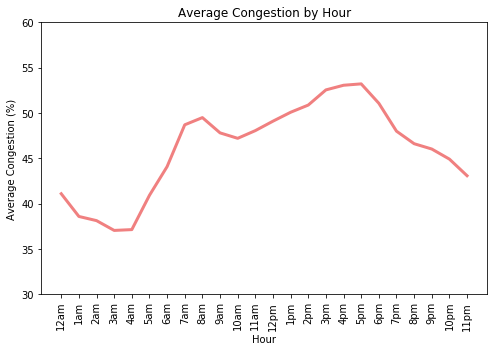

In [97]:
# Plot Average Congestion by Hour
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(congestion_hour_df.index.values,congestion_hour_df['congestion'],color='lightcoral',linewidth=3)

ax.set_title("Average Congestion by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Average Congestion (%)")
ax.set_xticks(congestion_hour_df.index.values)
ax.set_xticklabels(['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'],ha='center')
ax.tick_params(axis='x', rotation=90)
ax.set_ylim(30, 60)

# Export plot to .png
plt.savefig("Congestion_by_Hour2.png",bbox_inches='tight')

# Average Congestion and Average Crashes by Hour 
Read crash data, create combination plot of average congestion and average crashes by hour, perform statistical analysis

In [98]:
# Read crash summary file into DataFrame
crash_hour = pd.read_csv('Resources/Crashes_by_hour.csv')

# Display crash summary DataFrame
crash_hour

,CRASH_HOUR,RD_NO
0,0,3868
1,1,3311
2,2,2937
3,3,2436
4,4,2218
5,5,2865
6,6,4766
7,7,9639
8,8,11705
9,9,9994


In [99]:
# Compare congestion data and crash data by hour using Pearson's R
stats.pearsonr(congestion_hour_df['congestion'],crash_hour['RD_NO'])

(0.9645880784876198, 3.211742635847414e-14)

In [101]:
# Add column to DataFrame to calculate a daily average over two years (730 days)
crash_hour['daily_average'] = crash_hour['RD_NO'] / 730

# Display DataFrame head
crash_hour.head()

,CRASH_HOUR,RD_NO,daily_average
0,0,3868,5.298630
1,1,3311,4.535616
2,2,2937,4.023288
3,3,2436,3.336986
4,4,2218,3.038356


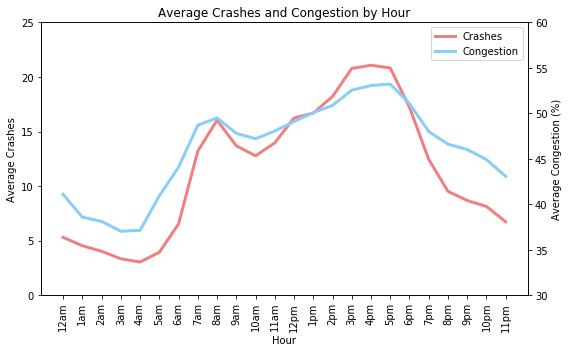

In [102]:
# Create shared plot
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)

# Create plot of average crashes
lns1 = ax1.plot(congestion_hour_df.index.values,crash_hour['daily_average'],color='lightcoral',label='Crashes',linewidth=3)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Create plot of average congestion
lns2 = ax2.plot(congestion_hour_df.index.values,congestion_hour_df['congestion'],color='lightskyblue',label='Congestion',linewidth=3)

# Add title, format x-axis and primary y-axis
ax1.set_title("Average Crashes and Congestion by Hour")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Average Crashes")
ax1.set_xticks(crash_hour.index.values)
ax1.set_xticklabels(['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'],ha='center')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, 25)

# Format secondary y-axis
ax2.set_ylabel("Average Congestion (%)")
ax2.set_ylim(30, 60)

# Add legend, including both datasets
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

# Display plot
fig.tight_layout()

# Export plot to .png
plt.savefig("Crashes_and_Congestion_by_Hour.png",bbox_inches='tight')